### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

### Loading data

In [2]:
iris_data = pd.read_csv("iris.csv")
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## EDA

## Step 1 - Basic analysis of dataset

In [3]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


Data Insights:
- Some features are having Null Entries
- Four columns are numerical type
- Only Single column categorical type

In [4]:
iris_data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [5]:
iris_data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [6]:
iris_data.shape

(150, 5)

In [7]:
iris_data.size

750

## Setp 2 - Statistical insights

In [8]:
# get statistical insights
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Data Insights:
- Mean values
- Standard Deviation ,
- Minimum Values
- Maximum Values
- Quartile values

In [9]:
# check datase is balanced or imbalanced
iris_data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Data insights
- Dataset is balanced
- we shouldn’t delete the entries as it might imbalance the data sets

## Step 3- Data cleaning

In [10]:
# Checking Null entries
iris_data.isna()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [11]:
iris_data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
# Removing Null Entries
iris_data.dropna(axis=0, inplace=True)
iris_data.shape

(150, 5)

In [13]:
# Imputing Missing values (mean, median, mode)
iris_data["SepalLengthCm"].fillna(value=iris_data["SepalLengthCm"].mean(), inplace = True)
iris_data["SepalWidthCm"].fillna(value=iris_data["SepalWidthCm"].median(), inplace = True)
iris_data["PetalLengthCm"].fillna(value=iris_data["PetalLengthCm"].mode(), inplace = True)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
# Checking Duplicates
iris_data.duplicated().sum()  #returning total number of duplicates entries

3

In [15]:
iris_data[iris_data.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [16]:
print(iris_data.to_string())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
0              5.1           3.5            1.4           0.2      Iris-setosa
1              4.9           3.0            1.4           0.2      Iris-setosa
2              4.7           3.2            1.3           0.2      Iris-setosa
3              4.6           3.1            1.5           0.2      Iris-setosa
4              5.0           3.6            1.4           0.2      Iris-setosa
5              5.4           3.9            1.7           0.4      Iris-setosa
6              4.6           3.4            1.4           0.3      Iris-setosa
7              5.0           3.4            1.5           0.2      Iris-setosa
8              4.4           2.9            1.4           0.2      Iris-setosa
9              4.9           3.1            1.5           0.1      Iris-setosa
10             5.4           3.7            1.5           0.2      Iris-setosa
11             4.8           3.4            1.6     

## Step 4- Data Visualization

### Uni-variate Analysis

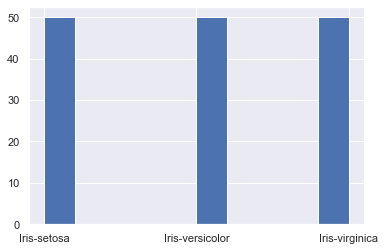

In [17]:
# 1. plottting histogram
plt.hist(iris_data['Species'])
plt.show() 

Data Insight:
- Species are well balanced
- Each species has 50 as it’s count

### Bivariate Analysis

#### Comparison between various species based on sepal length and width

#### Scatter plot

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on sapel length and width'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

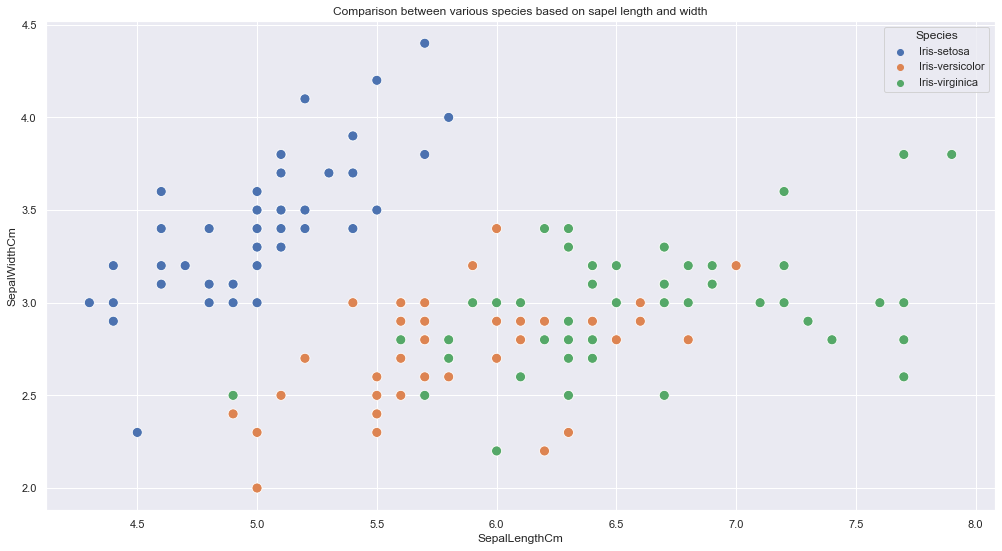

In [18]:
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on sapel length and width")
sns.scatterplot(iris_data["SepalLengthCm"],iris_data["SepalWidthCm"],hue =iris_data["Species"],s=100)

Data Insights:
- Iris Setosa species has smaller sepal length but higher width.
- Versicolor lies in almost middle for length as well as width
- Virginica has larger sepal lengths and smaller sepal widths

#### Comparison between various species based on petal length and width

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Comparison between various species based on Petal length and width'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

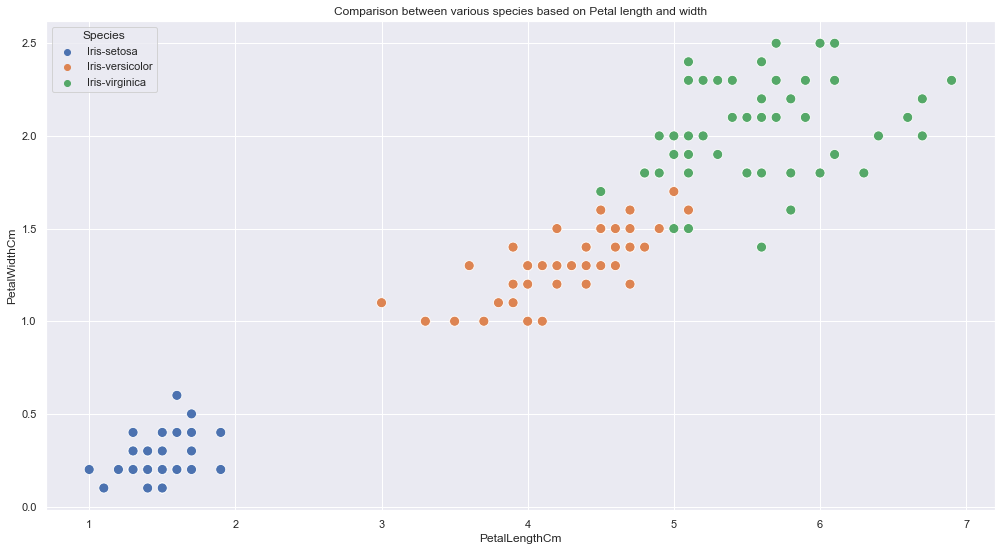

In [19]:
plt.figure(figsize=(17,9))
plt.title("Comparison between various species based on Petal length and width")
sns.scatterplot(iris_data["PetalLengthCm"],iris_data["PetalWidthCm"],hue =iris_data["Species"],s=100)

Data Insights
- Setosa species have the smallest petal length as well as petal width
- Versicolor species have average petal length and petal width
- Virginica species have the highest petal length as well as petal width

#### Pairplot

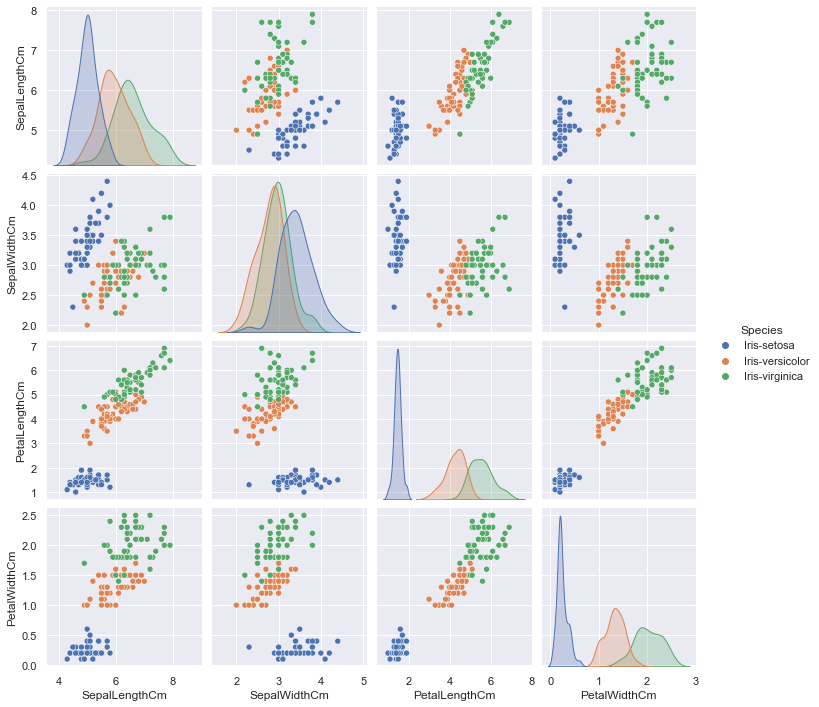

In [20]:
sns.pairplot(data=iris_data,hue="Species")

Data Insights:
- High co relation between petal length and width columns.
- Setosa has both low petal length and width
- Versicolor has both average petal length and width
- Virginica has both high petal length and width.


#### Heatmap

In [21]:
iris_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


[]

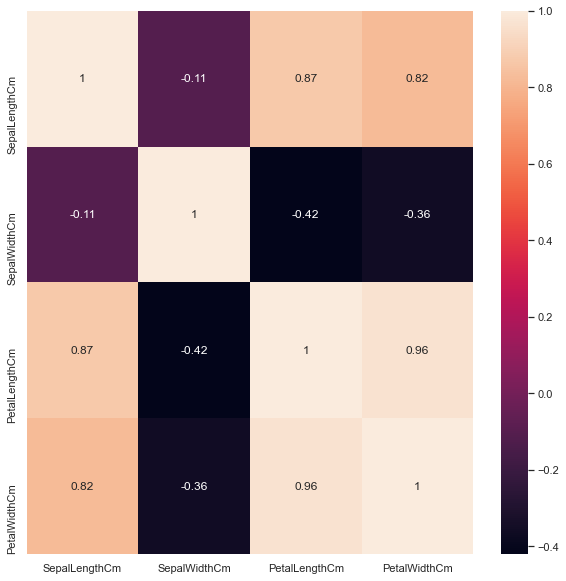

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(iris_data.corr(),annot=True)
plt.plot()

Data Insights:
- Sepal Length and Sepal Width features are slightly correlated with each other

#### Boxplot

See how the categorical feature “Species” is distributed with all other four input variables

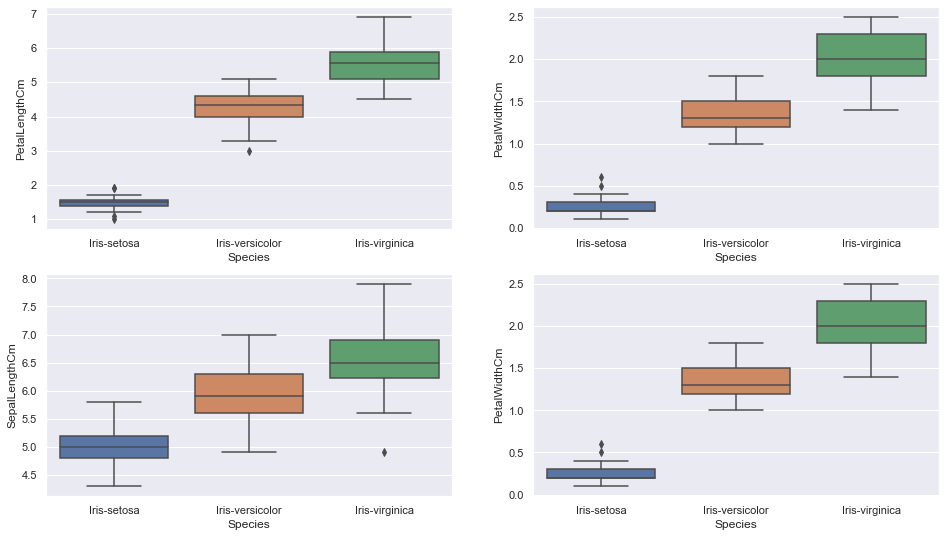

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y="PetalLengthCm", x= "Species", data=iris_data, orient="v" , ax=axes[0, 0])
sns.boxplot( y="PetalWidthCm", x= "Species", data=iris_data, orient="v" , ax=axes[0, 1])
sns.boxplot( y="SepalLengthCm",  x="Species", data=iris_data, orient="v" , ax=axes[1, 0])
sns.boxplot( y="PetalWidthCm", x= "Species", data=iris_data, orient="v" , ax=axes[1, 1])
plt.show()

Data Insights:
- Setosa is having smaller feature and less distributed
- Versicolor is distributed in a average manner and average features
- Virginica is highly distributed with large no .of values and features
- Also we can see their are some outliers, we will try to remove them

### Detect Outliers and remove it

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

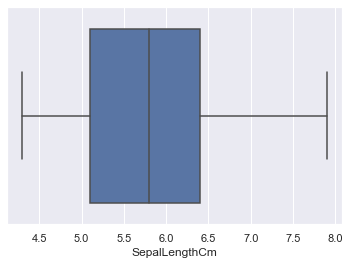

In [24]:
sns.boxplot(iris_data['SepalLengthCm'])

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

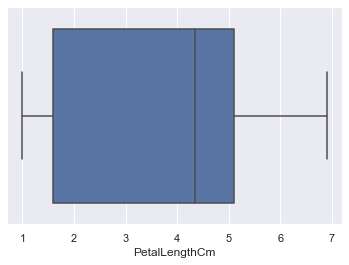

In [25]:
sns.boxplot(iris_data['PetalLengthCm'])

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

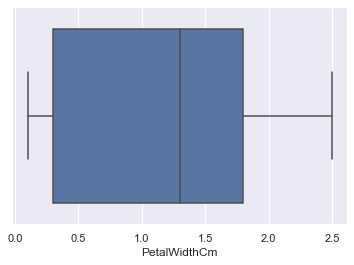

In [26]:
sns.boxplot(iris_data['PetalWidthCm'])

c:\users\user\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

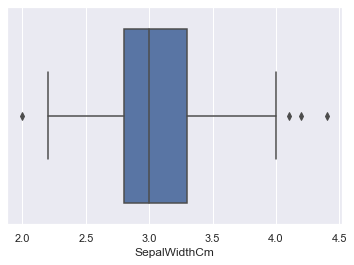

In [27]:
sns.boxplot(iris_data['SepalWidthCm'])

So i Sepal Width there is outlier, we will try to remove

In [28]:
# Position of the Outlier
print(np.where(iris_data['SepalWidthCm']>4))
print(np.where(iris_data['SepalWidthCm']<2.1))

(array([15, 32, 33], dtype=int32),)
(array([60], dtype=int32),)


In [29]:
''' Outlier Detection '''
# IQR
Q1 = np.percentile(iris_data['SepalWidthCm'], 25, interpolation = 'midpoint')
 
Q3 = np.percentile(iris_data['SepalWidthCm'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
 
print("Old Shape: ", iris_data.shape)
 
# Upper bound
upper = np.where(iris_data['SepalWidthCm'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(iris_data['SepalWidthCm'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
iris_data.drop(upper[0], inplace = True)
iris_data.drop(lower[0], inplace = True)
 
print("New Shape: ", iris_data.shape)

Old Shape:  (150, 5)
New Shape:  (146, 5)


### Multivariate Analysis

Try to show relationship between PetalLengthCm vs. PetalWidthCm vs. SepalLengthCm in 3D Scatter plot

In [30]:
# Import libraries for 3D plotting
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

<IPython.core.display.Javascript object>


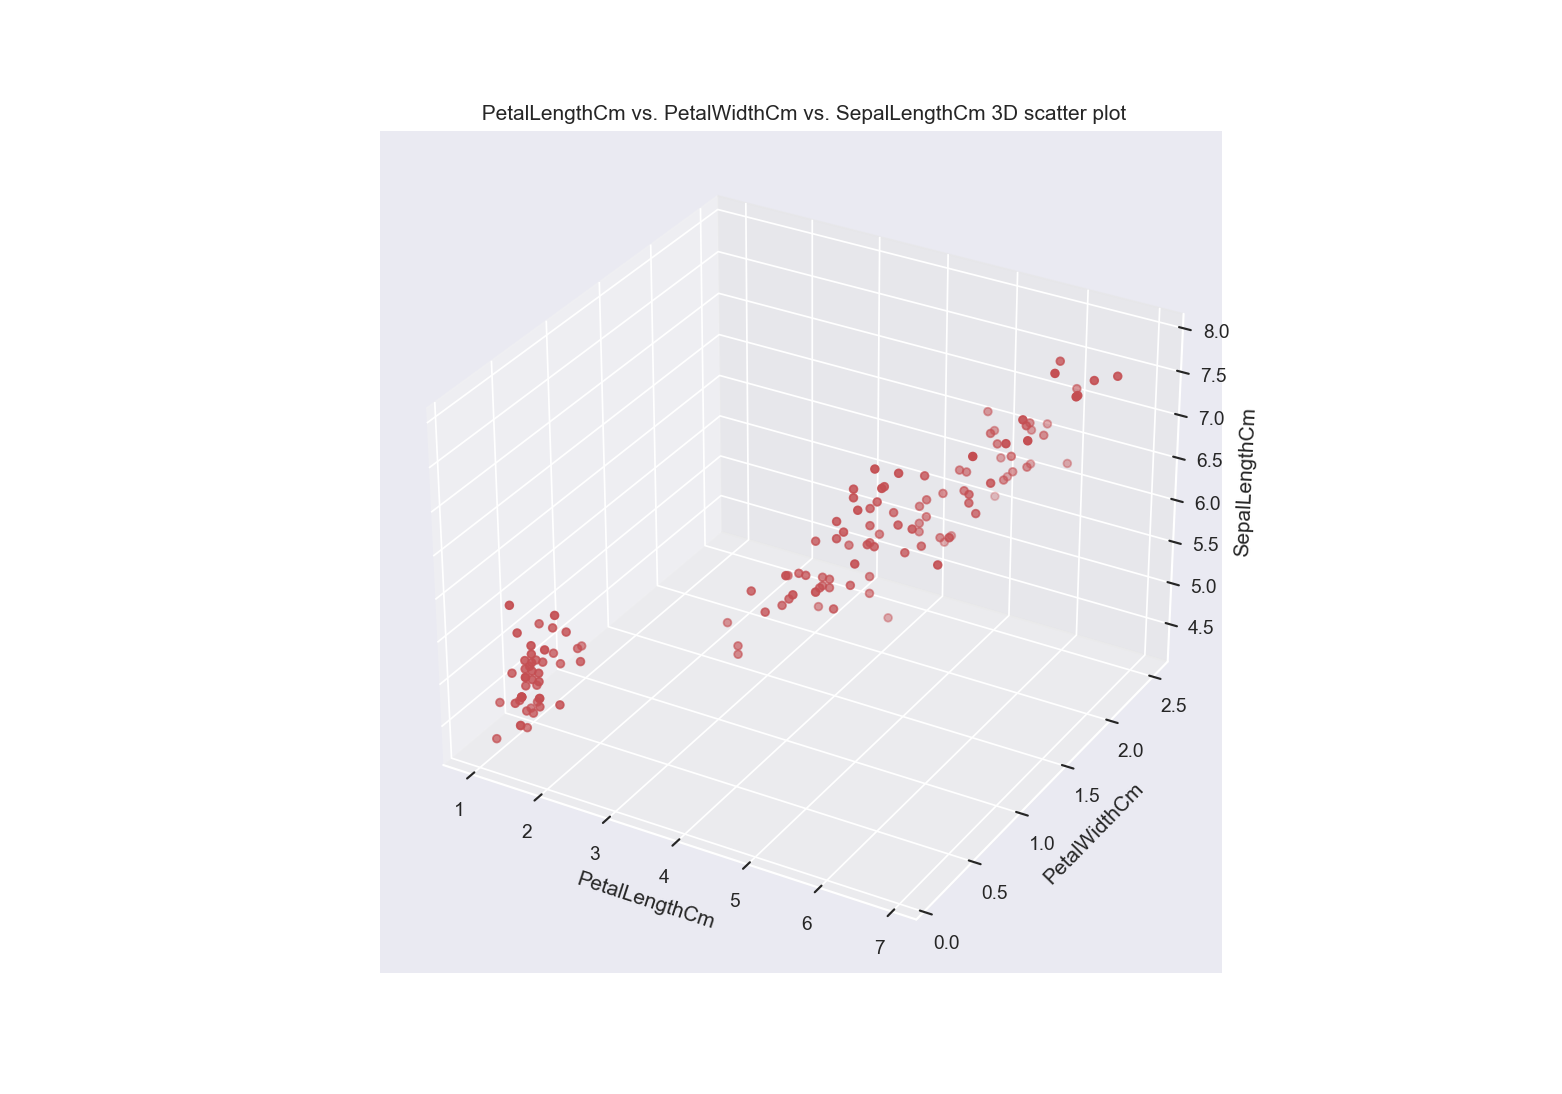

In [31]:
# Creating figure
%matplotlib notebook
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(iris_data[['PetalLengthCm']], iris_data[['PetalWidthCm']], iris_data[['SepalLengthCm']], color = "r")
plt.title(" PetalLengthCm vs. PetalWidthCm vs. SepalLengthCm 3D scatter plot")
ax.set_xlabel("PetalLengthCm")
ax.set_ylabel("PetalWidthCm")
ax.set_zlabel("SepalLengthCm")
plt.show()

In [32]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
